In [14]:
options(repr.plot.width=24, repr.plot.height=12)

# Integration goals

# Setup the Seurat objects

In [15]:
library(Seurat)
library(SeuratData)
library(patchwork)

In [16]:
# install dataset
InstallData("ifnb")

Warning message:
“The following packages are already installed and will not be reinstalled: ifnb”


In [17]:
# load dataset
ifnb <- LoadData("ifnb")
# split the RNA measurements into two layers one for control cells, one for stimulated cells

ifnb[["RNA"]] <- split(ifnb[["RNA"]], f = ifnb$stim)
ifnb

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version

Warning message:
“Assay RNA changing from Assay to Assay5”


An object of class Seurat 
14053 features across 13999 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)
 4 layers present: counts.CTRL, counts.STIM, data.CTRL, data.STIM

# Perform analysis without integration

In [18]:
# run standard anlaysis workflow
ifnb <- NormalizeData(ifnb)
ifnb <- FindVariableFeatures(ifnb)
ifnb <- ScaleData(ifnb)
ifnb <- RunPCA(ifnb)

Normalizing layer: counts.CTRL

Normalizing layer: counts.STIM

Finding variable features for layer counts.CTRL

Finding variable features for layer counts.STIM

Centering and scaling data matrix

PC_ 1 
Positive:  NPM1, CCR7, GIMAP7, LTB, CD7, SELL, CD2, TMSB4X, TRAT1, IL7R 
	   IL32, RHOH, ITM2A, RGCC, LEF1, CD3G, ALOX5AP, CREM, NHP2, PASK 
	   MYC, SNHG8, TSC22D3, GPR171, BIRC3, NOP58, RARRES3, CD27, SRM, CD8B 
Negative:  TYROBP, C15orf48, FCER1G, CST3, SOD2, ANXA5, FTL, TYMP, TIMP1, CD63 
	   LGALS1, CTSB, S100A4, LGALS3, KYNU, PSAP, FCN1, NPC2, ANXA2, S100A11 
	   IGSF6, LYZ, SPI1, APOBEC3A, CD68, CTSL, SDCBP, NINJ1, HLA-DRA, CCL2 
PC_ 2 
Positive:  ISG15, ISG20, IFIT3, IFIT1, LY6E, TNFSF10, IFIT2, MX1, IFI6, RSAD2 
	   CXCL10, OAS1, CXCL11, IFITM3, MT2A, OASL, TNFSF13B, IDO1, IL1RN, APOBEC3A 
	   GBP1, CCL8, HERC5, FAM26F, GBP4, HES4, WARS, VAMP5, DEFB1, XAF1 
Negative:  IL8, CLEC5A, CD14, VCAN, S100A8, IER3, MARCKSL1, IL1B, PID1, CD9 
	   GPX1, PHLDA1, INSIG1, PLAUR, PPIF, THBS1

In [19]:
ifnb <- FindNeighbors(ifnb, dims = 1:30, reduction = "pca")
ifnb <- FindClusters(ifnb, resolution = 2, cluster.name = "unintegrated_clusters")

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 555146

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8153
Number of communities: 26
Elapsed time: 1 seconds


08:37:33 UMAP embedding parameters a = 0.9922 b = 1.112

08:37:33 Read 13999 rows and found 30 numeric columns

08:37:33 Using Annoy for neighbor search, n_neighbors = 30

08:37:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:37:34 Writing NN index file to temp file /tmp/RtmpiEVZD1/filecab2ae23e59

08:37:34 Searching Annoy index using 1 thread, search_k = 3000

08:37:37 Annoy recall = 100%

08:37:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:37:37 Initializing from normalized Laplacian + noise (using RSpectra)

08:37:38 Commencing optimization for 200 epochs, with 614378 positive edges

08:37:42 Optimization finished



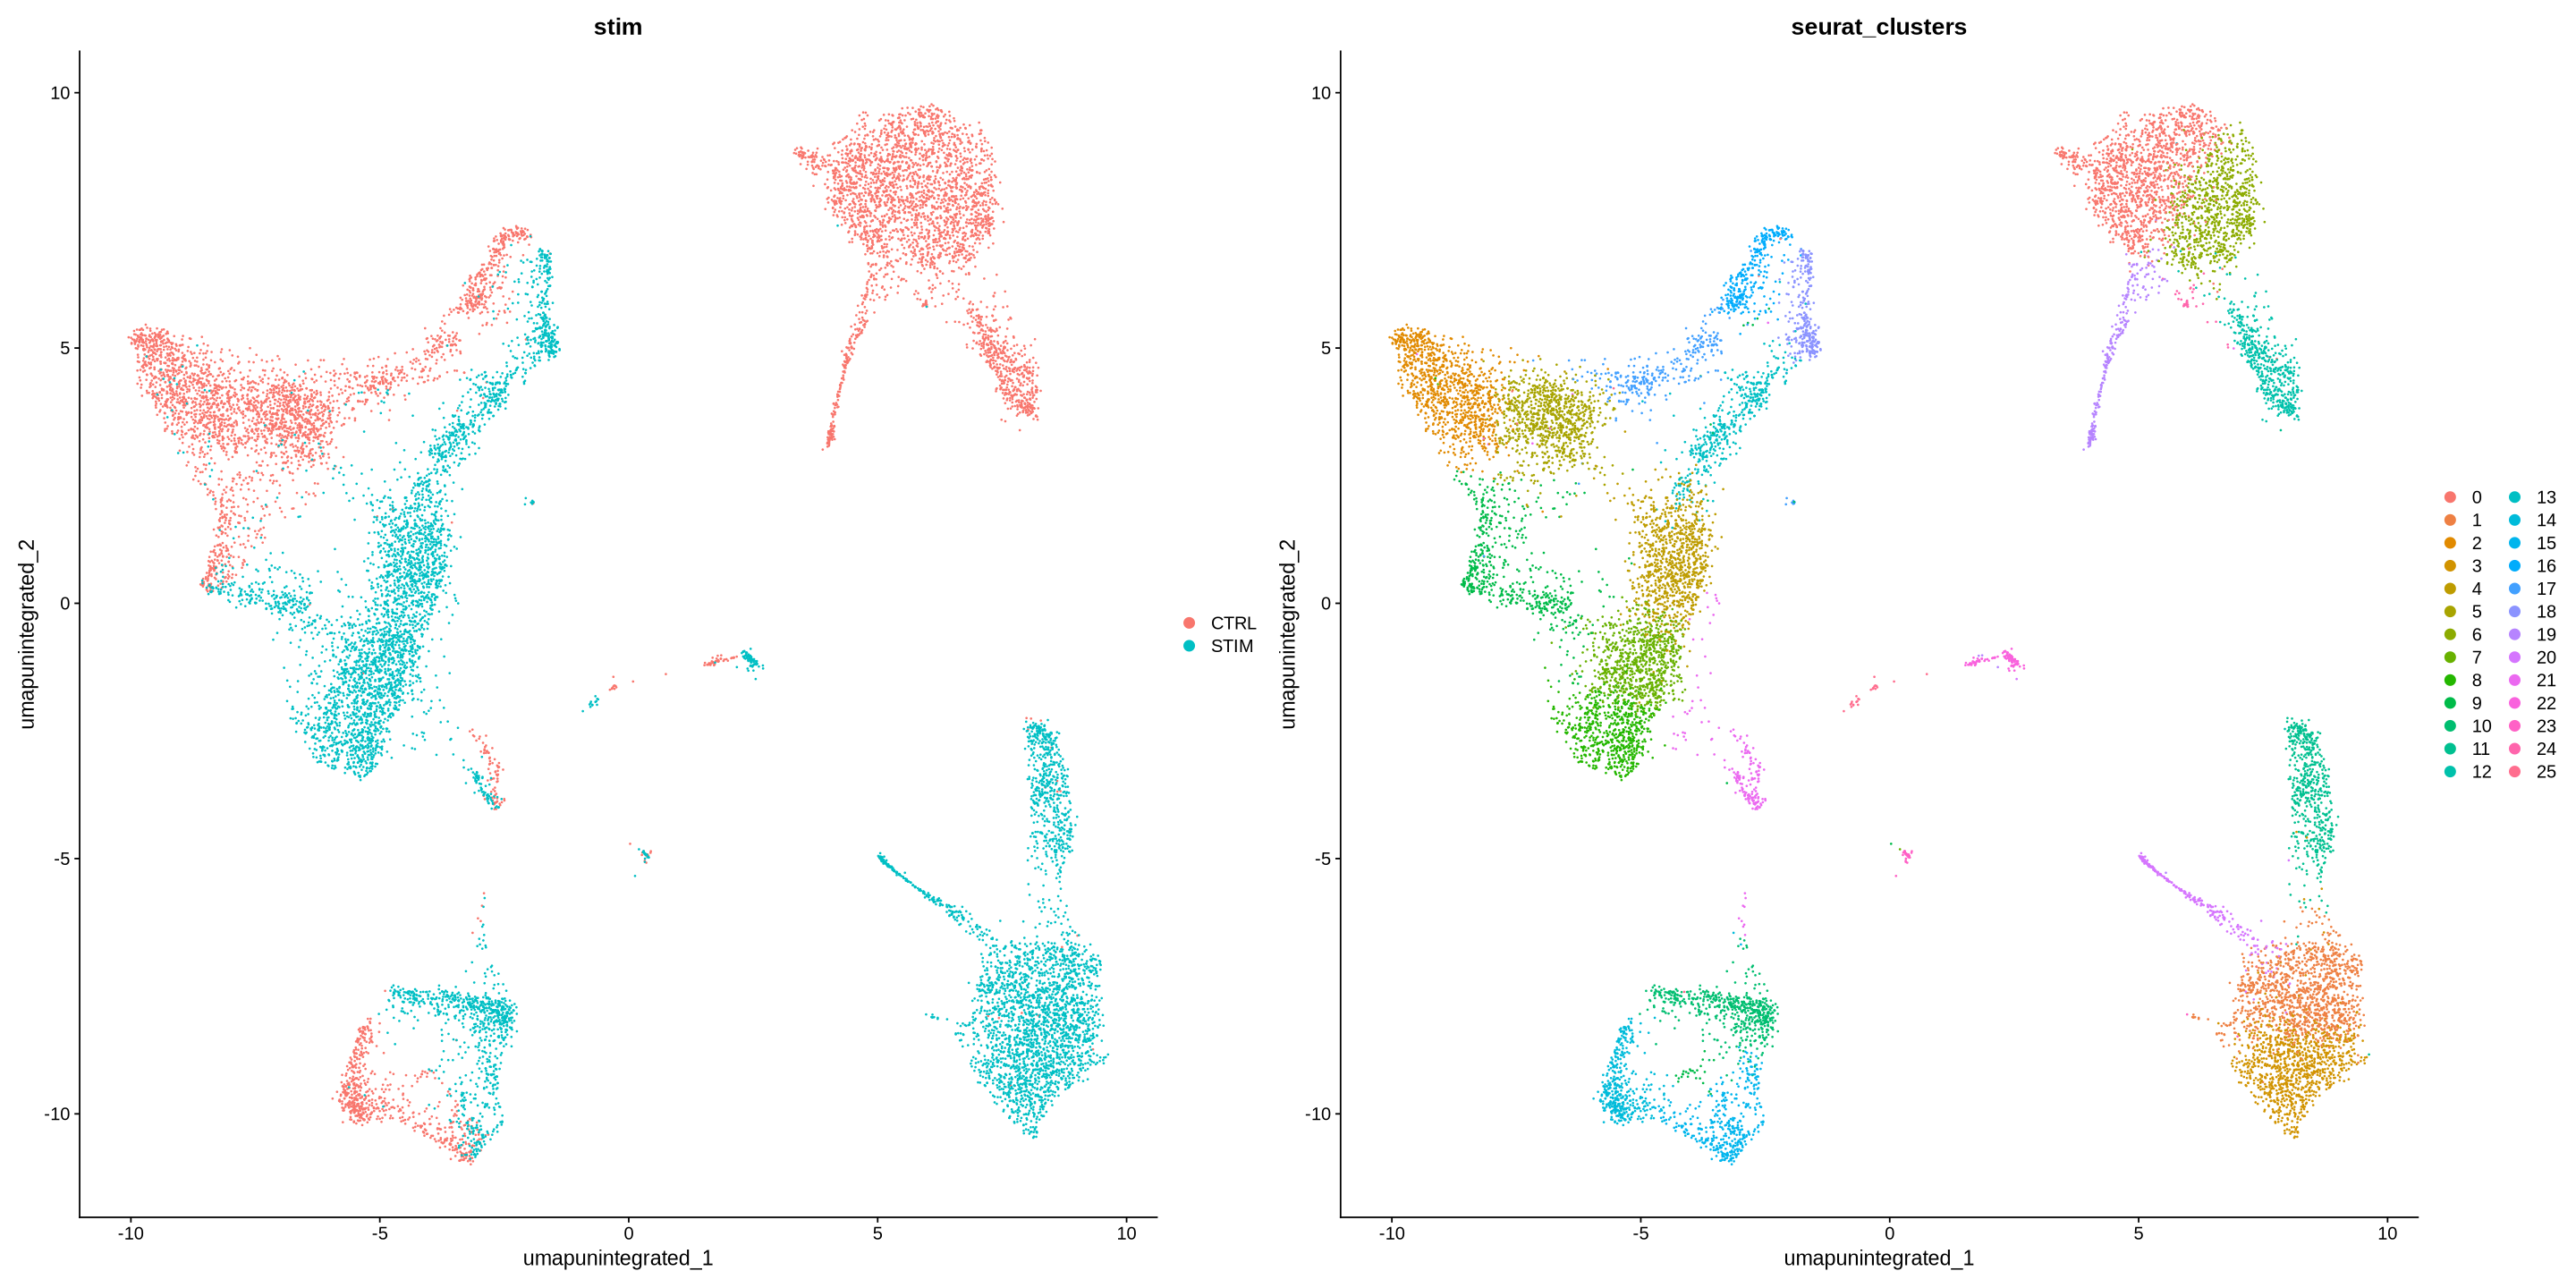

In [20]:
ifnb <- RunUMAP(ifnb, dims = 1:30, reduction = "pca", reduction.name = "umap.unintegrated")
DimPlot(ifnb, reduction = "umap.unintegrated", group.by = c("stim", "seurat_clusters"))

# Perform integration

In [21]:
ifnb <- IntegrateLayers(object = ifnb, method = CCAIntegration, orig.reduction = "pca", new.reduction = "integrated.cca",
    verbose = FALSE)

# re-join layers after integration
ifnb[["RNA"]] <- JoinLayers(ifnb[["RNA"]])

ifnb <- FindNeighbors(ifnb, reduction = "integrated.cca", dims = 1:30)
ifnb <- FindClusters(ifnb, resolution = 1)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 590558

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8449
Number of communities: 18
Elapsed time: 1 seconds


In [22]:
ifnb <- RunUMAP(ifnb, dims = 1:30, reduction = "integrated.cca")

08:39:05 UMAP embedding parameters a = 0.9922 b = 1.112

08:39:05 Read 13999 rows and found 30 numeric columns

08:39:05 Using Annoy for neighbor search, n_neighbors = 30

08:39:05 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:39:05 Writing NN index file to temp file /tmp/RtmpiEVZD1/filecab6df71fee

08:39:05 Searching Annoy index using 1 thread, search_k = 3000

08:39:08 Annoy recall = 100%

08:39:08 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:39:09 Initializing from normalized Laplacian + noise (using RSpectra)

08:39:09 Commencing optimization for 200 epochs, with 629246 positive edges

08:39:13 Optimization finished



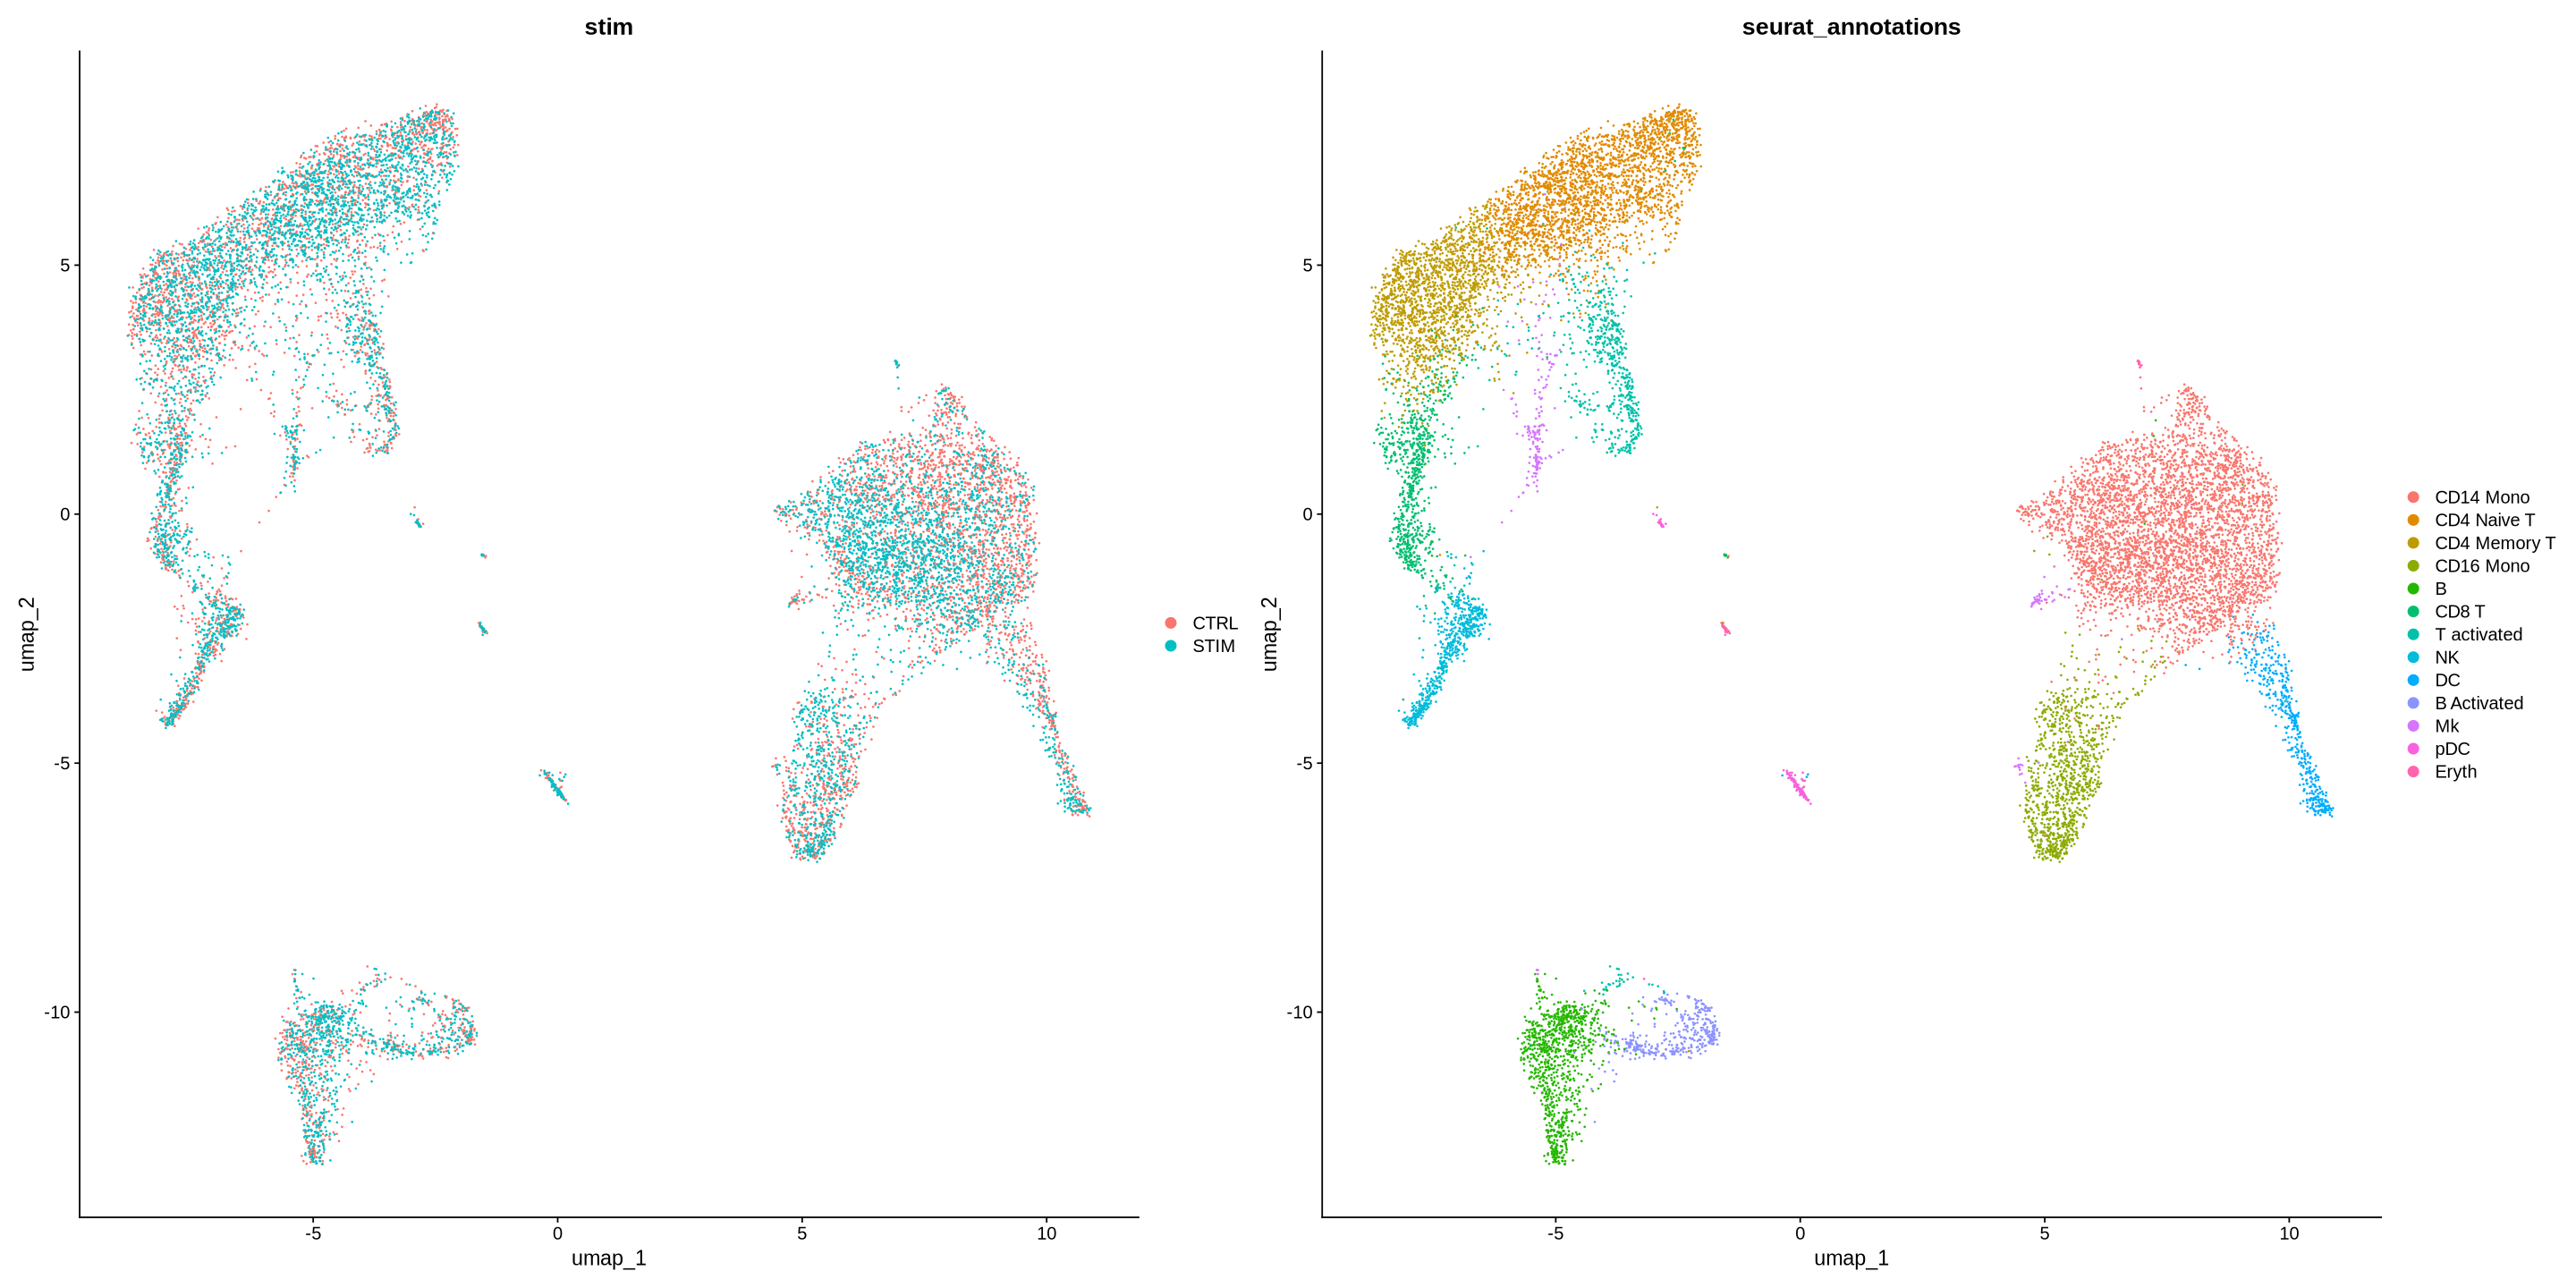

In [23]:
# Visualization
DimPlot(ifnb, reduction = "umap", group.by = c("stim", "seurat_annotations"))

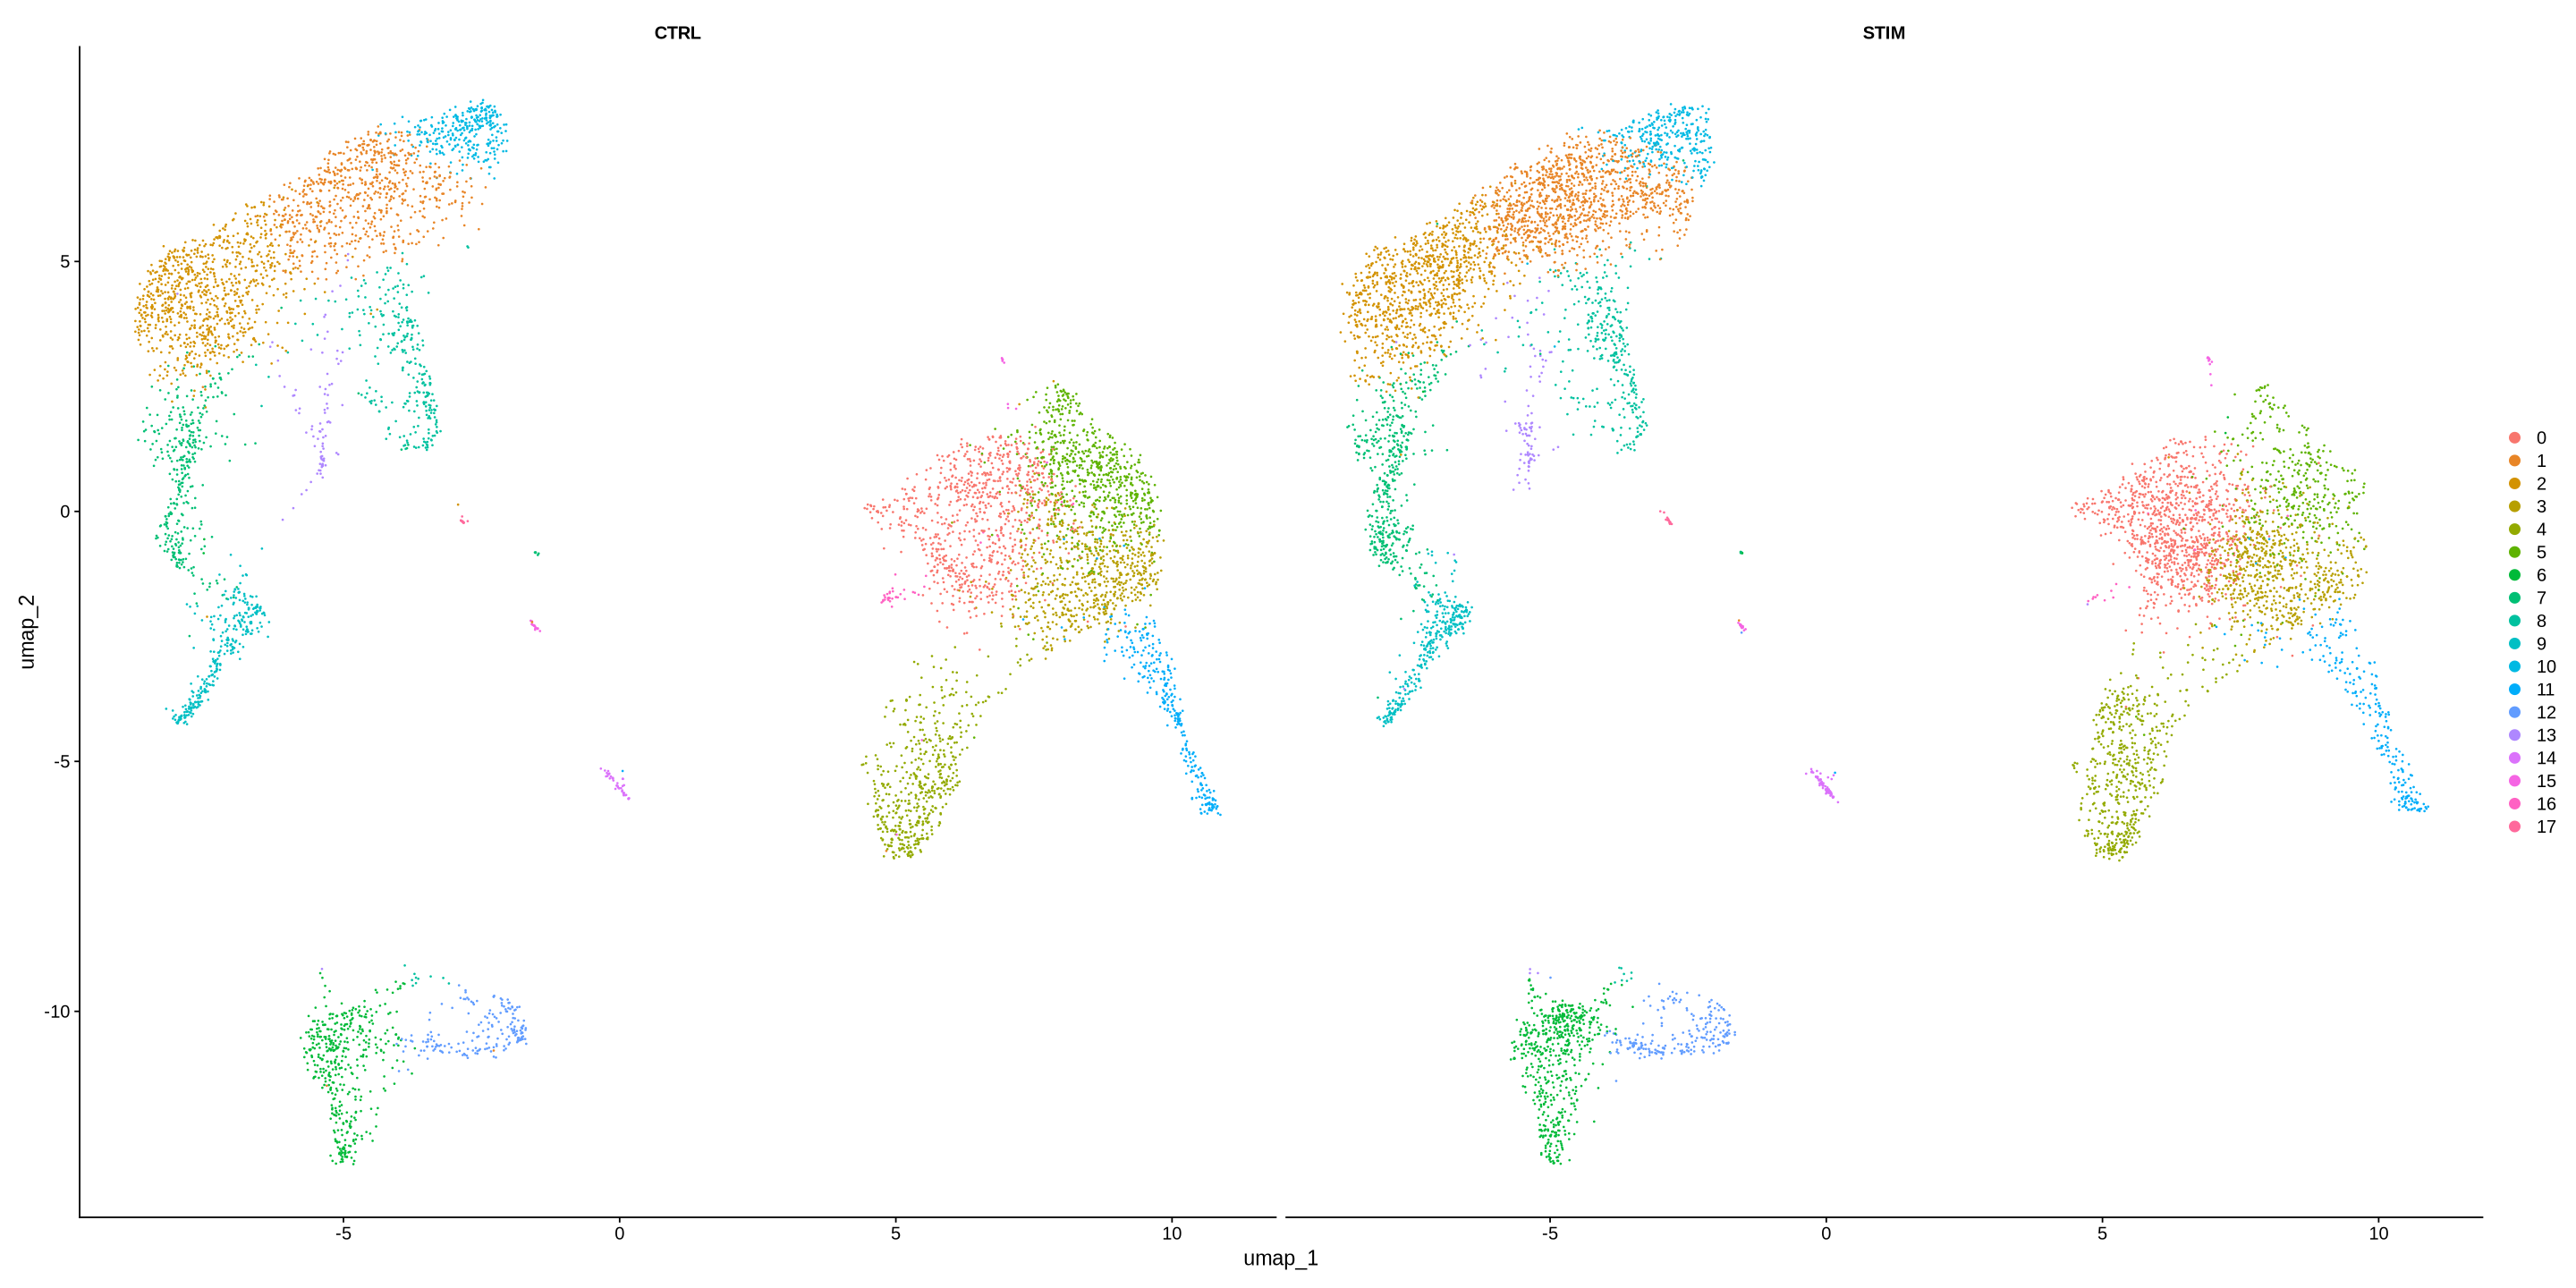

In [24]:
DimPlot(ifnb, reduction = "umap", split.by = "stim")

# Identify conserved cell type markers

In [26]:
Idents(ifnb) <- "seurat_annotations"
nk.markers <- FindConservedMarkers(ifnb, ident.1 = "NK", grouping.var = "stim", verbose = FALSE)
head(nk.markers)

CTRL_p_val CTRL_avg_log2FC CTRL_pct.1 CTRL_pct.2 CTRL_p_val_adj
GNLY  0          6.854586        0.943      0.046      0             
NKG7  0          5.358881        0.953      0.085      0             
GZMB  0          5.078135        0.839      0.044      0             
CLIC3 0          5.765314        0.601      0.024      0             
CTSW  0          5.307246        0.537      0.030      0             
KLRD1 0          5.261553        0.507      0.019      0             
      STIM_p_val STIM_avg_log2FC STIM_pct.1 STIM_pct.2 STIM_p_val_adj max_pval
GNLY  0          6.435910        0.956      0.059      0              0       
NKG7  0          4.971397        0.950      0.081      0              0       
GZMB  0          5.151924        0.897      0.060      0              0       
CLIC3 0          5.505208        0.623      0.031      0              0       
CTSW  0          5.240729        0.592      0.035      0              0       
KLRD1 0          4.852457        0.555      0.027      0              0       
      minimump_p_val
GNLY  0             
NKG7  0             
GZMB  0             
CLIC3 0             
CTSW  0             
KLRD1 0

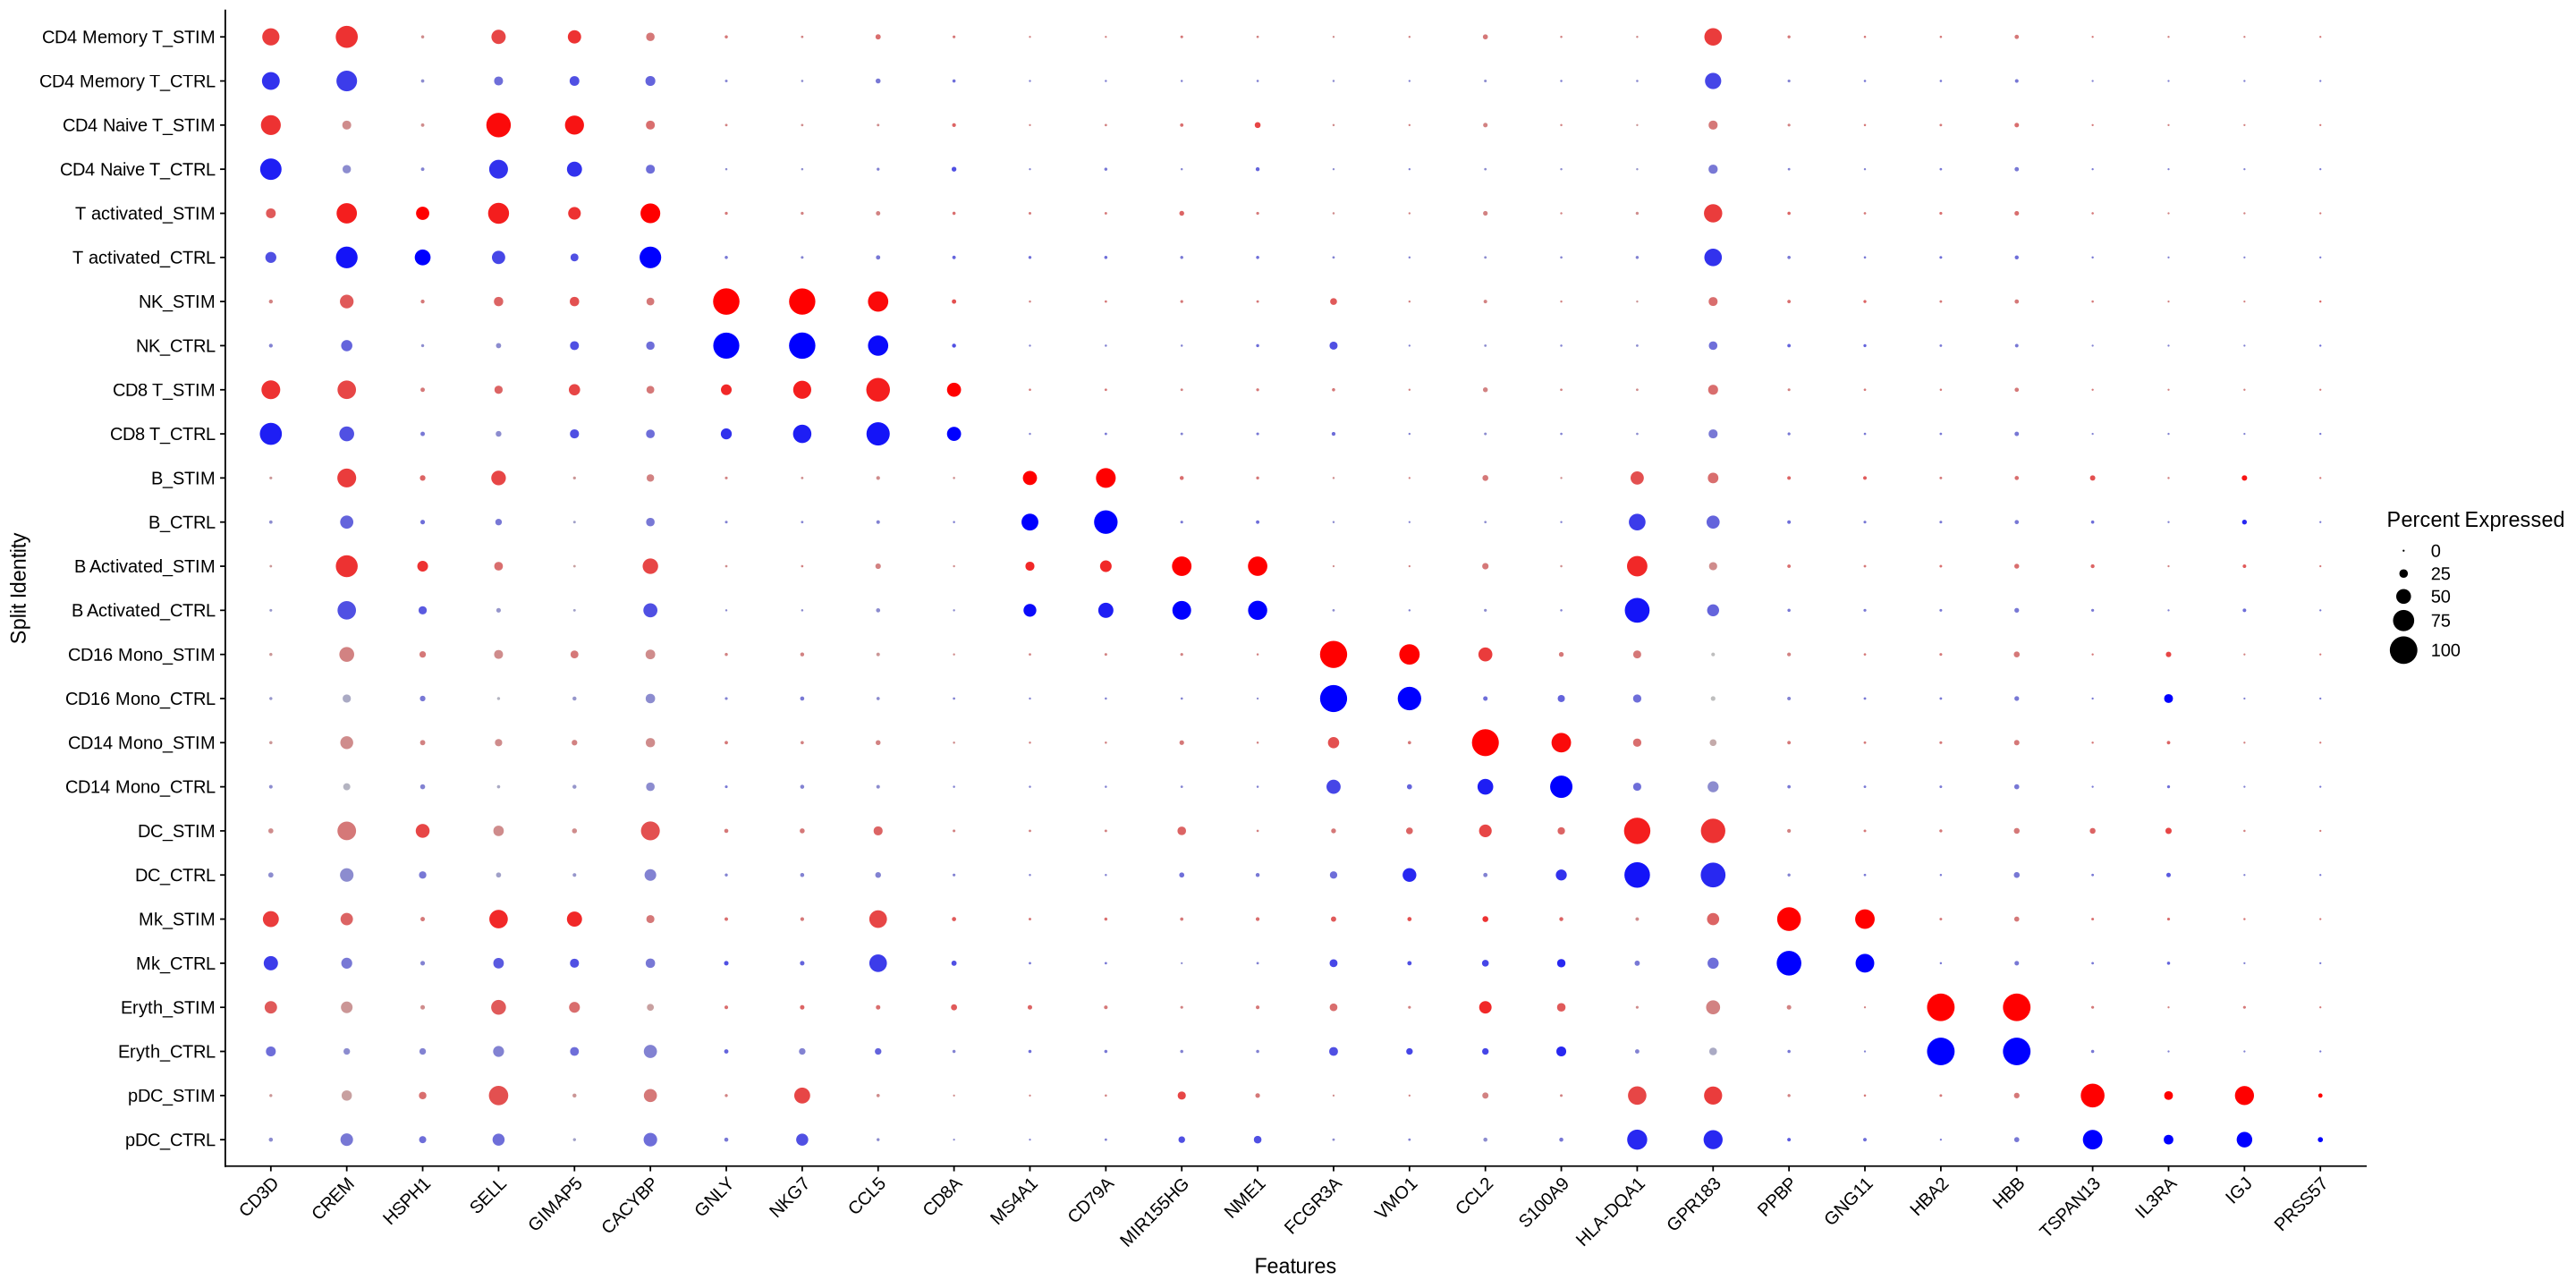

In [27]:
# NEEDS TO BE FIXED AND SET ORDER CORRECTLY
Idents(ifnb) <- factor(Idents(ifnb), levels = c("pDC", "Eryth", "Mk", "DC", "CD14 Mono", "CD16 Mono",
    "B Activated", "B", "CD8 T", "NK", "T activated", "CD4 Naive T", "CD4 Memory T"))

markers.to.plot <- c("CD3D", "CREM", "HSPH1", "SELL", "GIMAP5", "CACYBP", "GNLY", "NKG7", "CCL5",
    "CD8A", "MS4A1", "CD79A", "MIR155HG", "NME1", "FCGR3A", "VMO1", "CCL2", "S100A9", "HLA-DQA1",
    "GPR183", "PPBP", "GNG11", "HBA2", "HBB", "TSPAN13", "IL3RA", "IGJ", "PRSS57")
DotPlot(ifnb, features = markers.to.plot, cols = c("blue", "red"), dot.scale = 8, split.by = "stim") +
    RotatedAxis()

# Identify differential expressed genes across conditions


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


Centering and scaling data matrix

Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
When using repel, set xnudge and ynudge to 0 for optimal results

When using repel, set xnudge and ynudge to 0 for optimal results



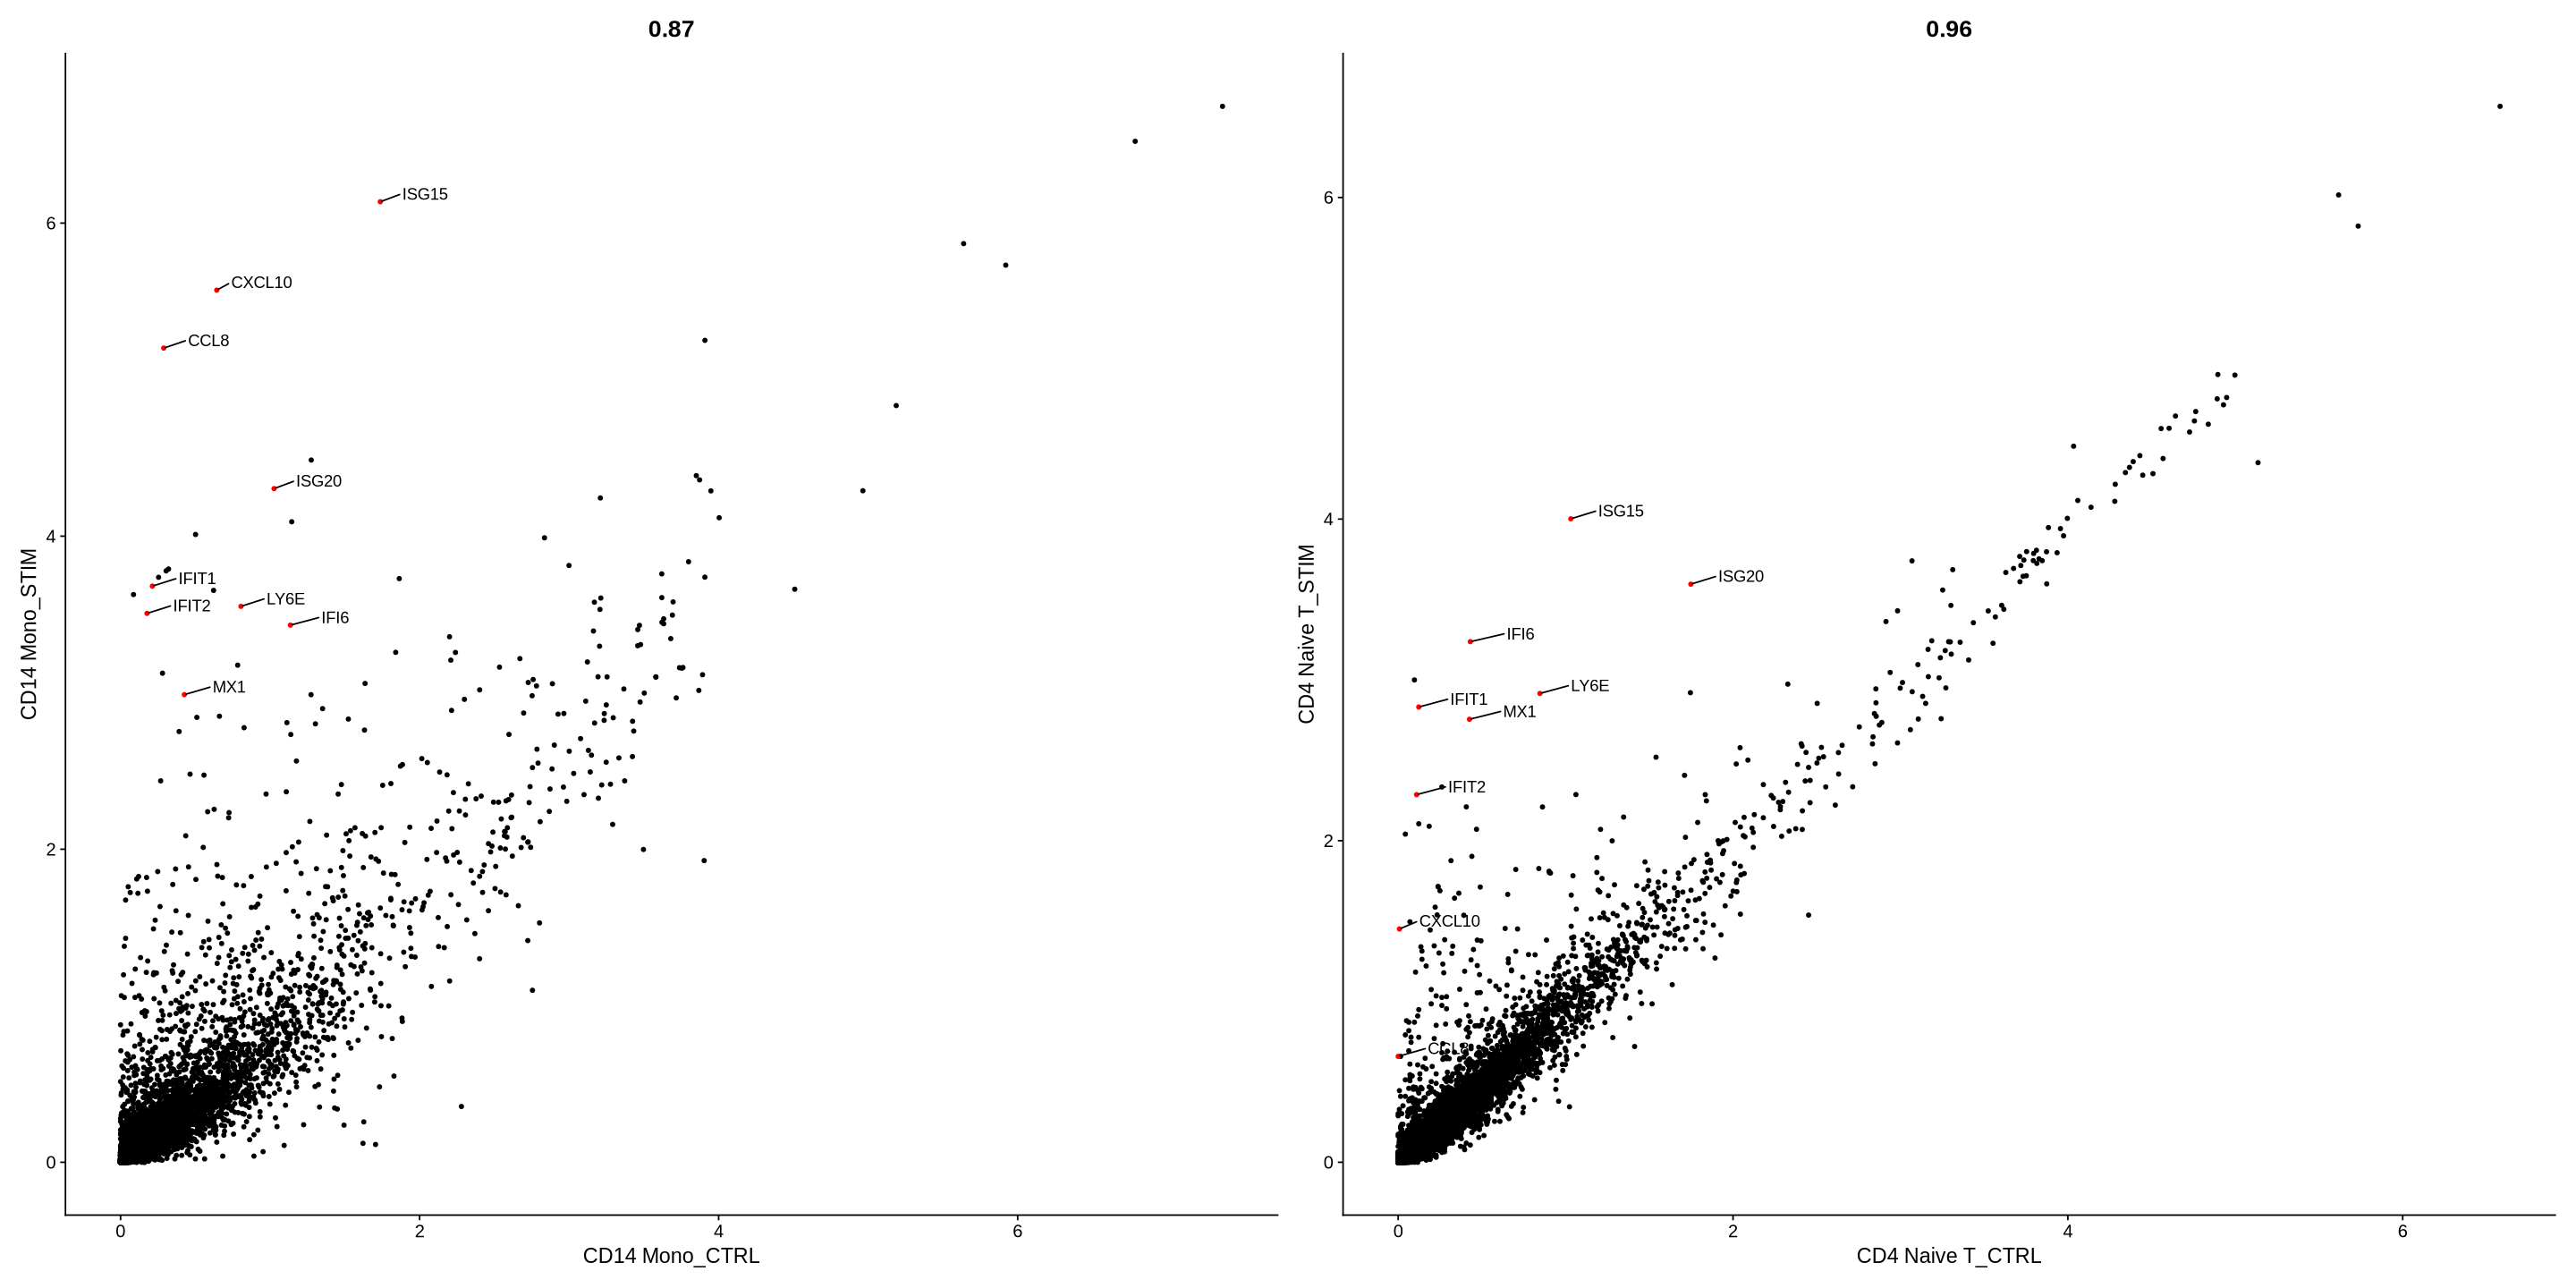

In [28]:
library(ggplot2)
library(cowplot)
theme_set(theme_cowplot())

aggregate_ifnb <- AggregateExpression(ifnb, group.by = c("seurat_annotations", "stim"), return.seurat = TRUE)
genes.to.label = c("ISG15", "LY6E", "IFI6", "ISG20", "MX1", "IFIT2", "IFIT1", "CXCL10", "CCL8")

p1 <- CellScatter(aggregate_ifnb, "CD14 Mono_CTRL", "CD14 Mono_STIM", highlight = genes.to.label)
p2 <- LabelPoints(plot = p1, points = genes.to.label, repel = TRUE)

p3 <- CellScatter(aggregate_ifnb, "CD4 Naive T_CTRL", "CD4 Naive T_STIM", highlight = genes.to.label)
p4 <- LabelPoints(plot = p3, points = genes.to.label, repel = TRUE)

p2 + p4

In [29]:
ifnb$celltype.stim <- paste(ifnb$seurat_annotations, ifnb$stim, sep = "_")
Idents(ifnb) <- "celltype.stim"
b.interferon.response <- FindMarkers(ifnb, ident.1 = "B_STIM", ident.2 = "B_CTRL", verbose = FALSE)
head(b.interferon.response, n = 15)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
ISG15   5.387767e-159 5.0588481  0.998 0.233 7.571429e-155
IFIT3   1.945114e-154 6.1124940  0.965 0.052 2.733468e-150
IFI6    2.503565e-152 5.4933132  0.965 0.076 3.518260e-148
ISG20   6.492570e-150 3.0549593  1.000 0.668 9.124009e-146
IFIT1   1.951022e-139 6.2320388  0.907 0.029 2.741772e-135
MX1     6.897626e-123 3.9798482  0.905 0.115 9.693234e-119
LY6E    2.825649e-120 3.7907800  0.898 0.150 3.970885e-116
TNFSF10 4.007285e-112 6.5802175  0.786 0.020 5.631437e-108
IFIT2   2.672552e-108 5.5525558  0.786 0.037 3.755738e-104
B2M      5.283684e-98 0.6104044  1.000 1.000  7.425161e-94
PLSCR1   4.634658e-96 3.8010721  0.793 0.113  6.513085e-92
IRF7     2.411149e-94 3.1992949  0.835 0.187  3.388388e-90
CXCL10   3.708508e-86 8.0906108  0.651 0.010  5.211566e-82
UBE2L6   5.547472e-83 2.5167981  0.851 0.297  7.795863e-79
PSMB9    1.716262e-77 1.7715351  0.937 0.568  2.411863e-73

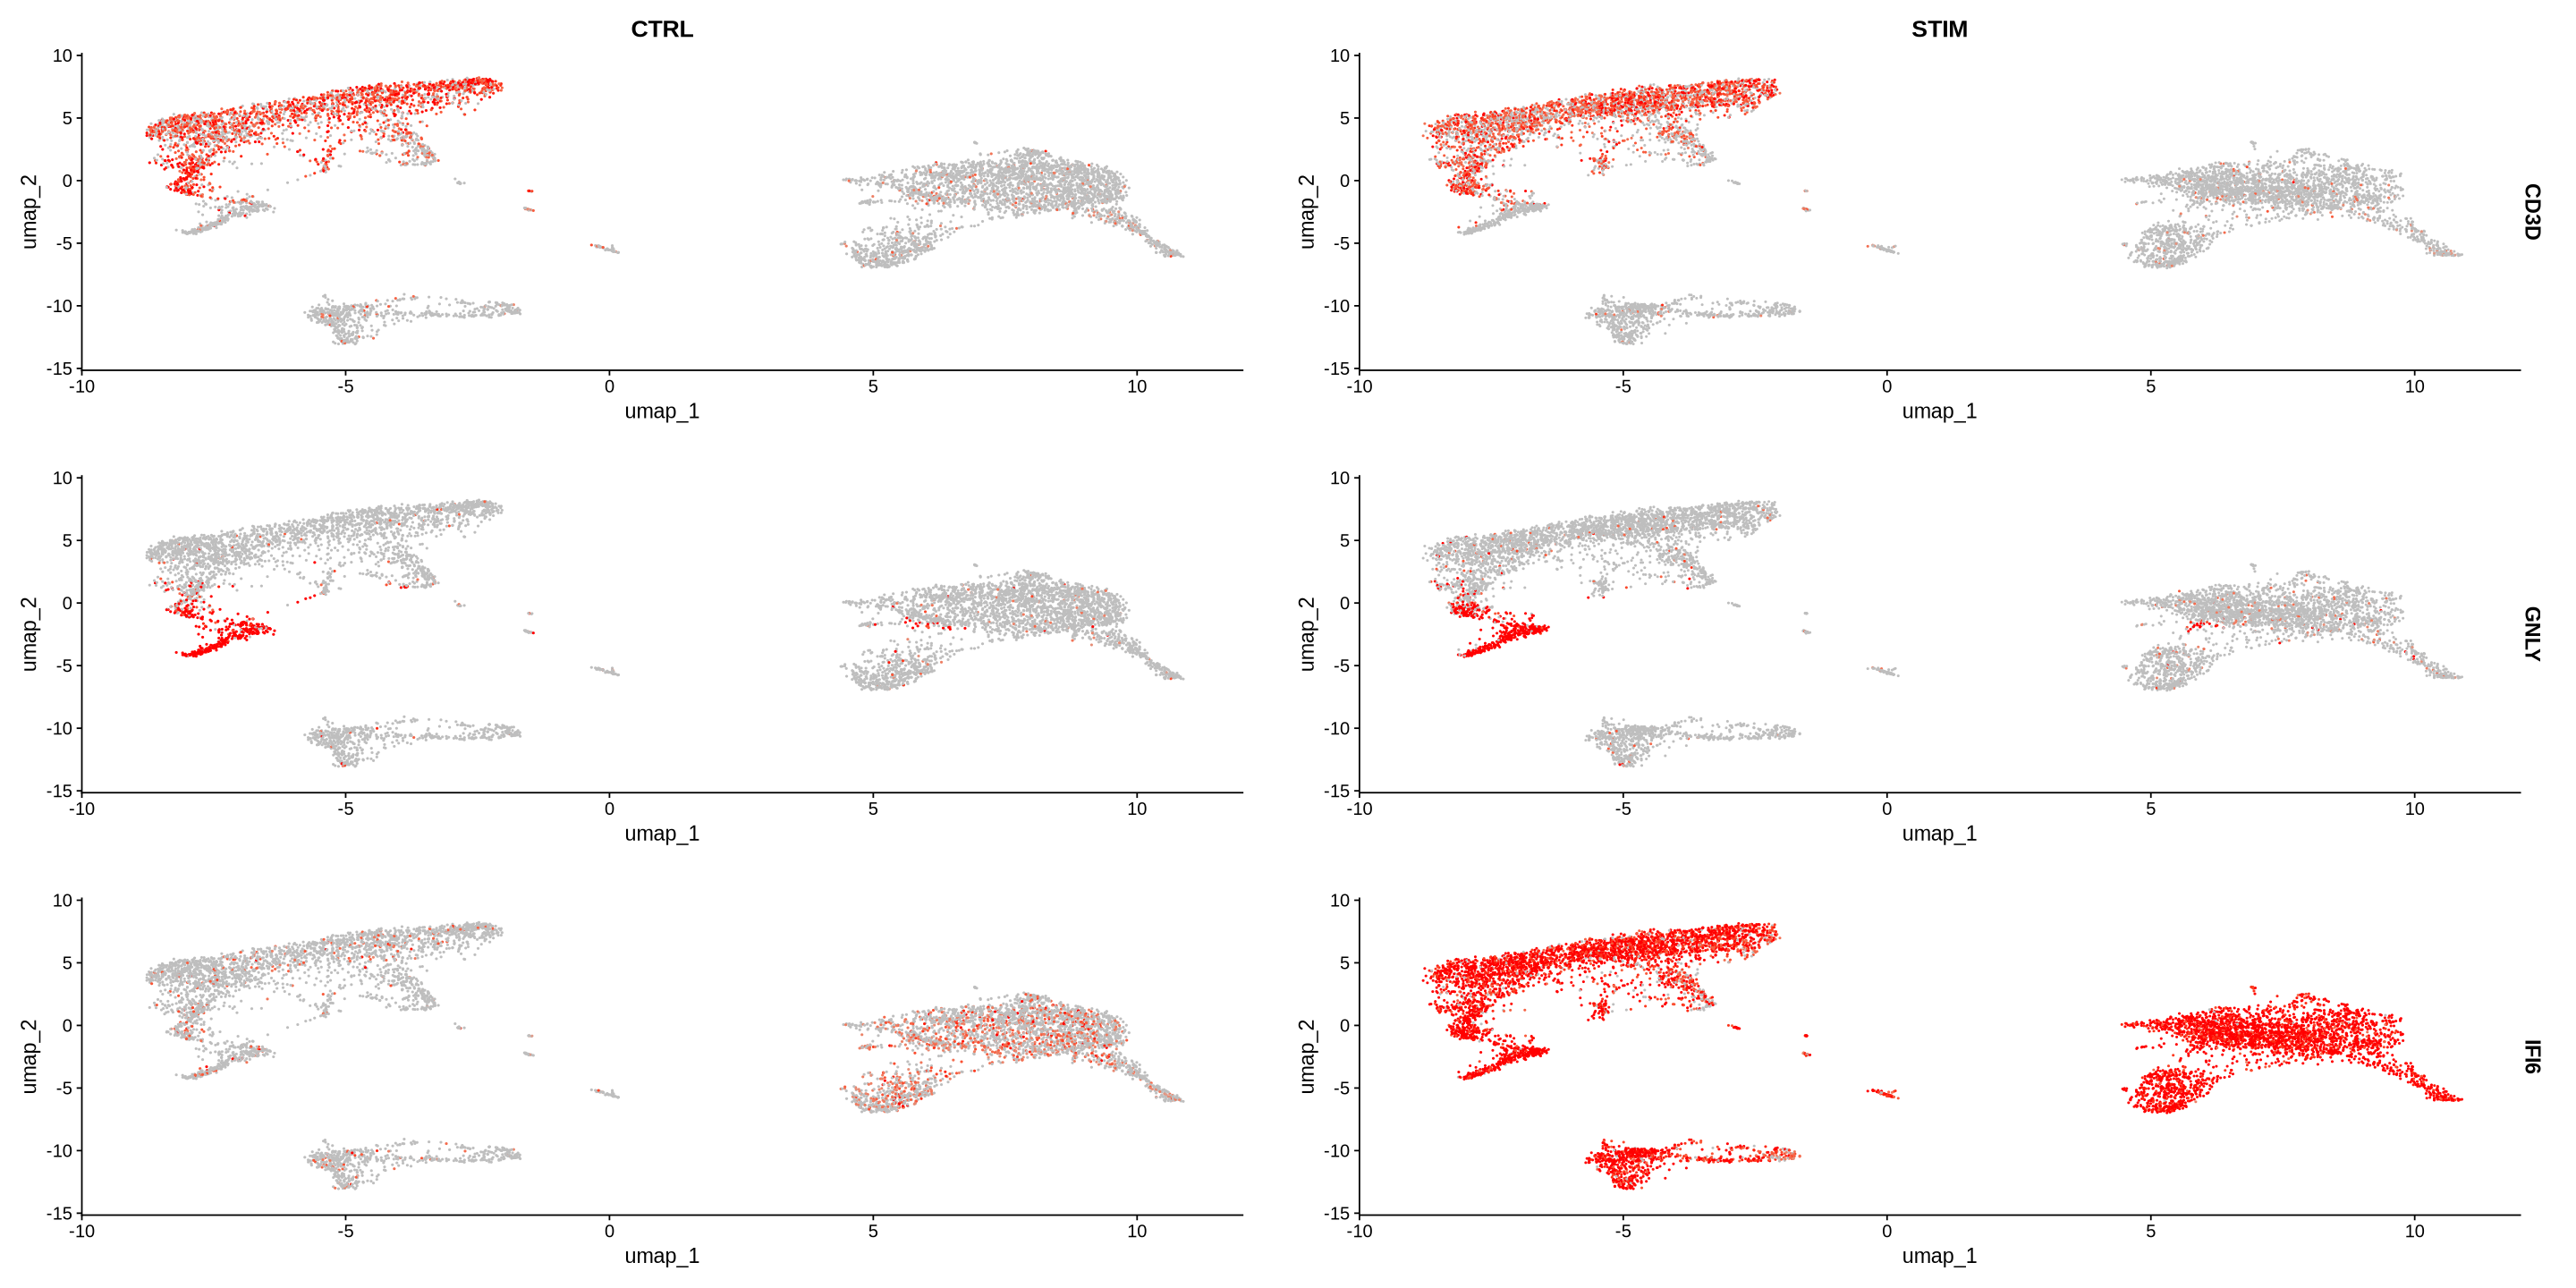

In [30]:
FeaturePlot(ifnb, features = c("CD3D", "GNLY", "IFI6"), split.by = "stim", max.cutoff = 3, cols = c("grey",
    "red"), reduction = "umap")

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



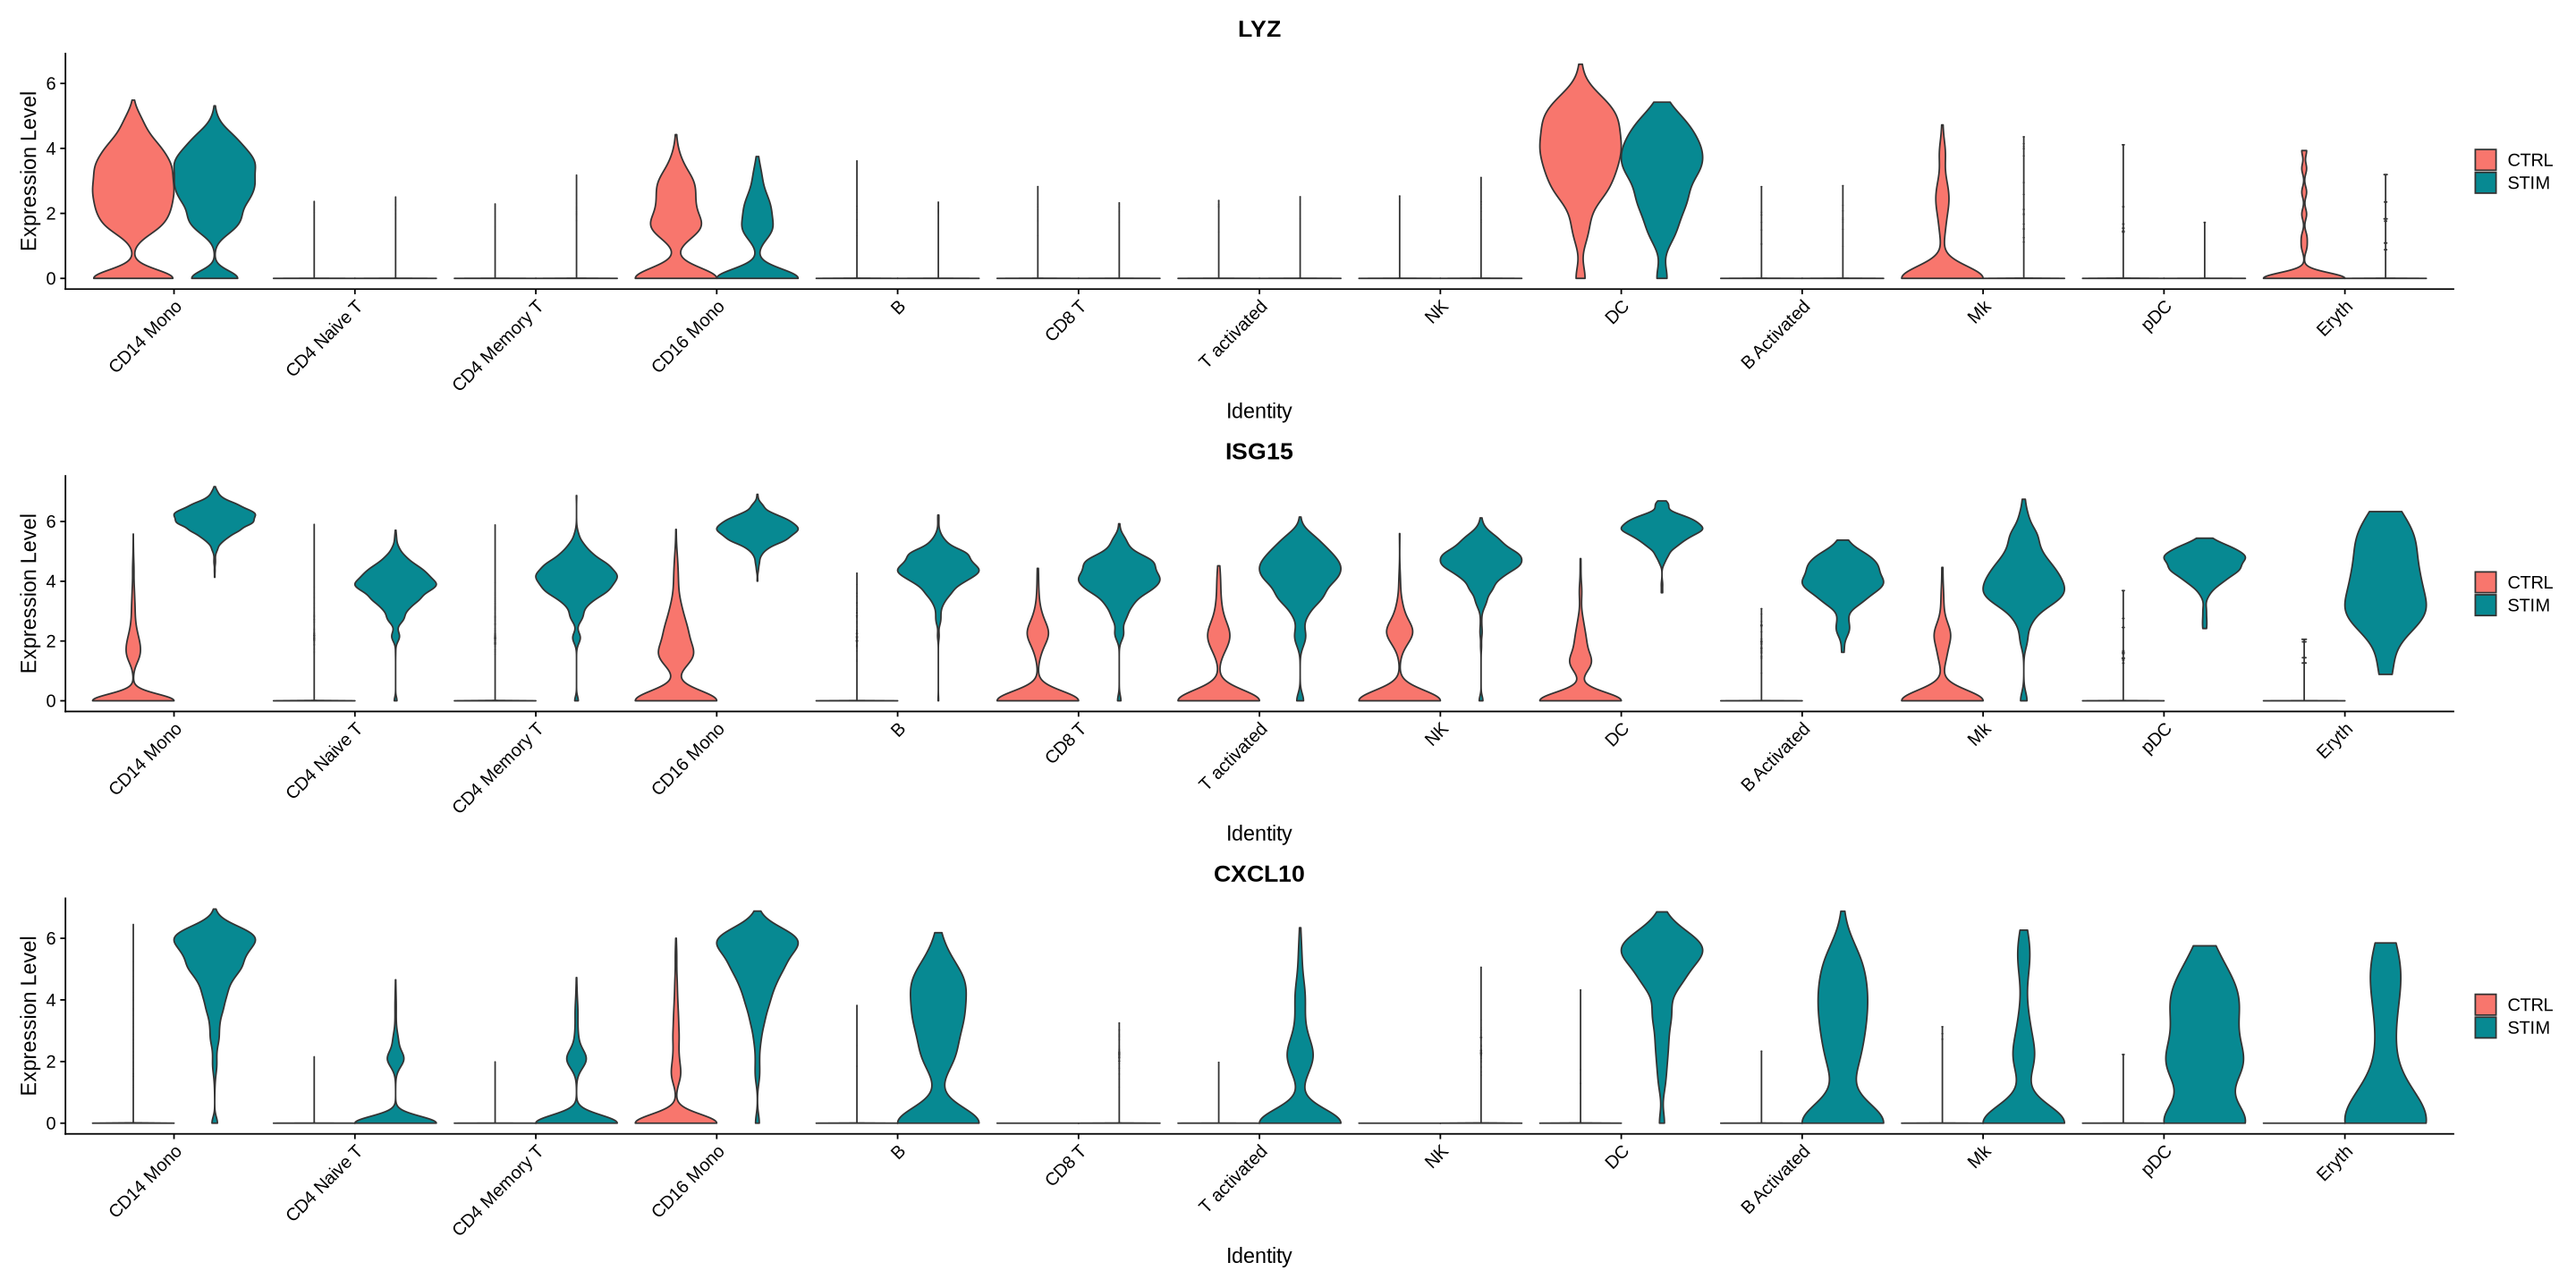

In [31]:
plots <- VlnPlot(ifnb, features = c("LYZ", "ISG15", "CXCL10"), split.by = "stim", group.by = "seurat_annotations",
    pt.size = 0, combine = FALSE)
wrap_plots(plots = plots, ncol = 1)

# Perform integration with SCTransform-normalized datasets

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version

Warning message:
“Assay RNA changing from Assay to Assay5”
Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 7 features requested have not been scaled (running reduction without them): NUPR1, CXCL13, CH25H, MMP7, HRASLS2, CCL18, APOE”
PC_ 1 
Positive:  FTL, CCL2, CCL8, CXCL10, TIMP1, SOD2, C15orf48, CCL7, FTH1, APOBEC3A 
	   APOBEC3B, LYZ, CCL3, IL8, FCER1G, TYROBP, CCL4, CTSL, LGALS3, S100A8 
	   S100A9, CD63, IFI27, ISG15, LGALS1, IDO1, ANXA5, TYMP, S100A4, S100A11 
Negative:  RPL3, RPS18, RPS6, RPL13, RPL21, RPL13A, RPS2, RPS4X, RPS14, RPL10 
	   R

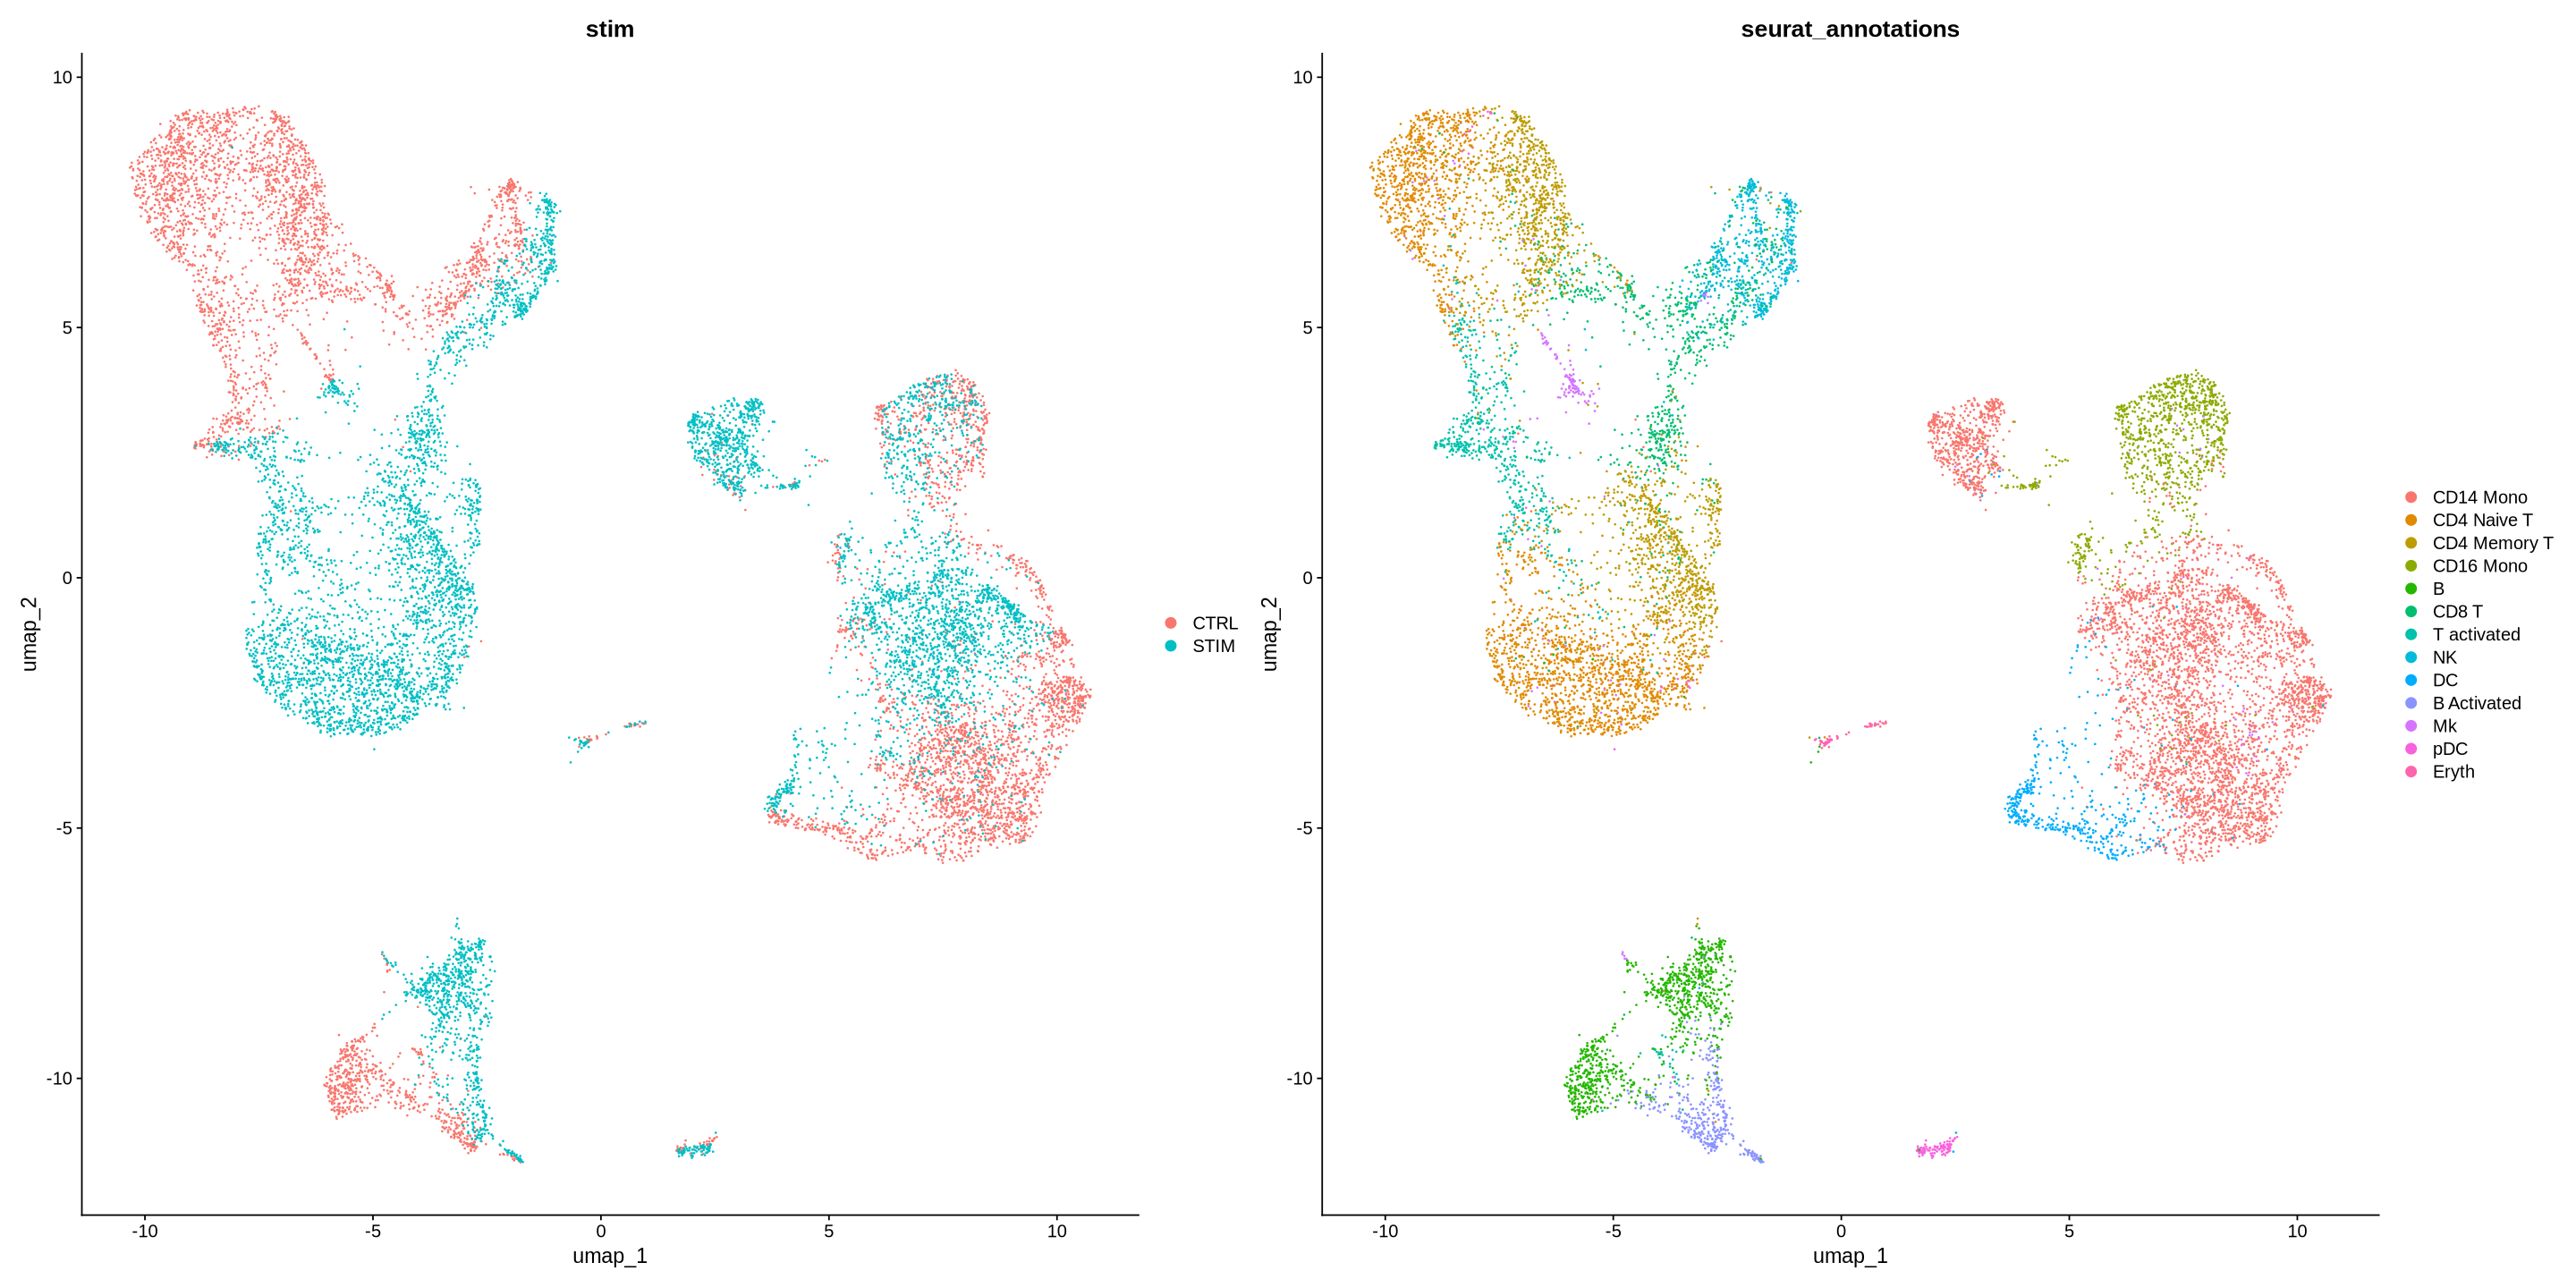

In [35]:
ifnb <- LoadData("ifnb")

# split datasets and process without integration
ifnb[["RNA"]] <- split(ifnb[["RNA"]], f = ifnb$stim)
ifnb <- SCTransform(ifnb, verbose = FALSE)
ifnb <- RunPCA(ifnb)
ifnb <- RunUMAP(ifnb, dims = 1:30)
DimPlot(ifnb, reduction = "umap", group.by = c("stim", "seurat_annotations"))

In [36]:
# integrate datasets
ifnb <- IntegrateLayers(object = ifnb, method = CCAIntegration, normalization.method = "SCT", verbose = F)
ifnb <- FindNeighbors(ifnb, reduction = "integrated.dr", dims = 1:30)
ifnb <- FindClusters(ifnb, resolution = 0.6)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 544729

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9072
Number of communities: 19
Elapsed time: 1 seconds


08:59:47 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

08:59:47 Read 13999 rows and found 30 numeric columns

08:59:47 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

08:59:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:59:48 Writing NN index file to temp file /tmp/RtmpiEVZD1/filecab1122f159

08:59:48 Searching Annoy index using 1 thread, search_k = 3000

08:59:50 Annoy recall = 100%

08:59:51 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

08:59:52 Initializing from normalized Laplacian + n

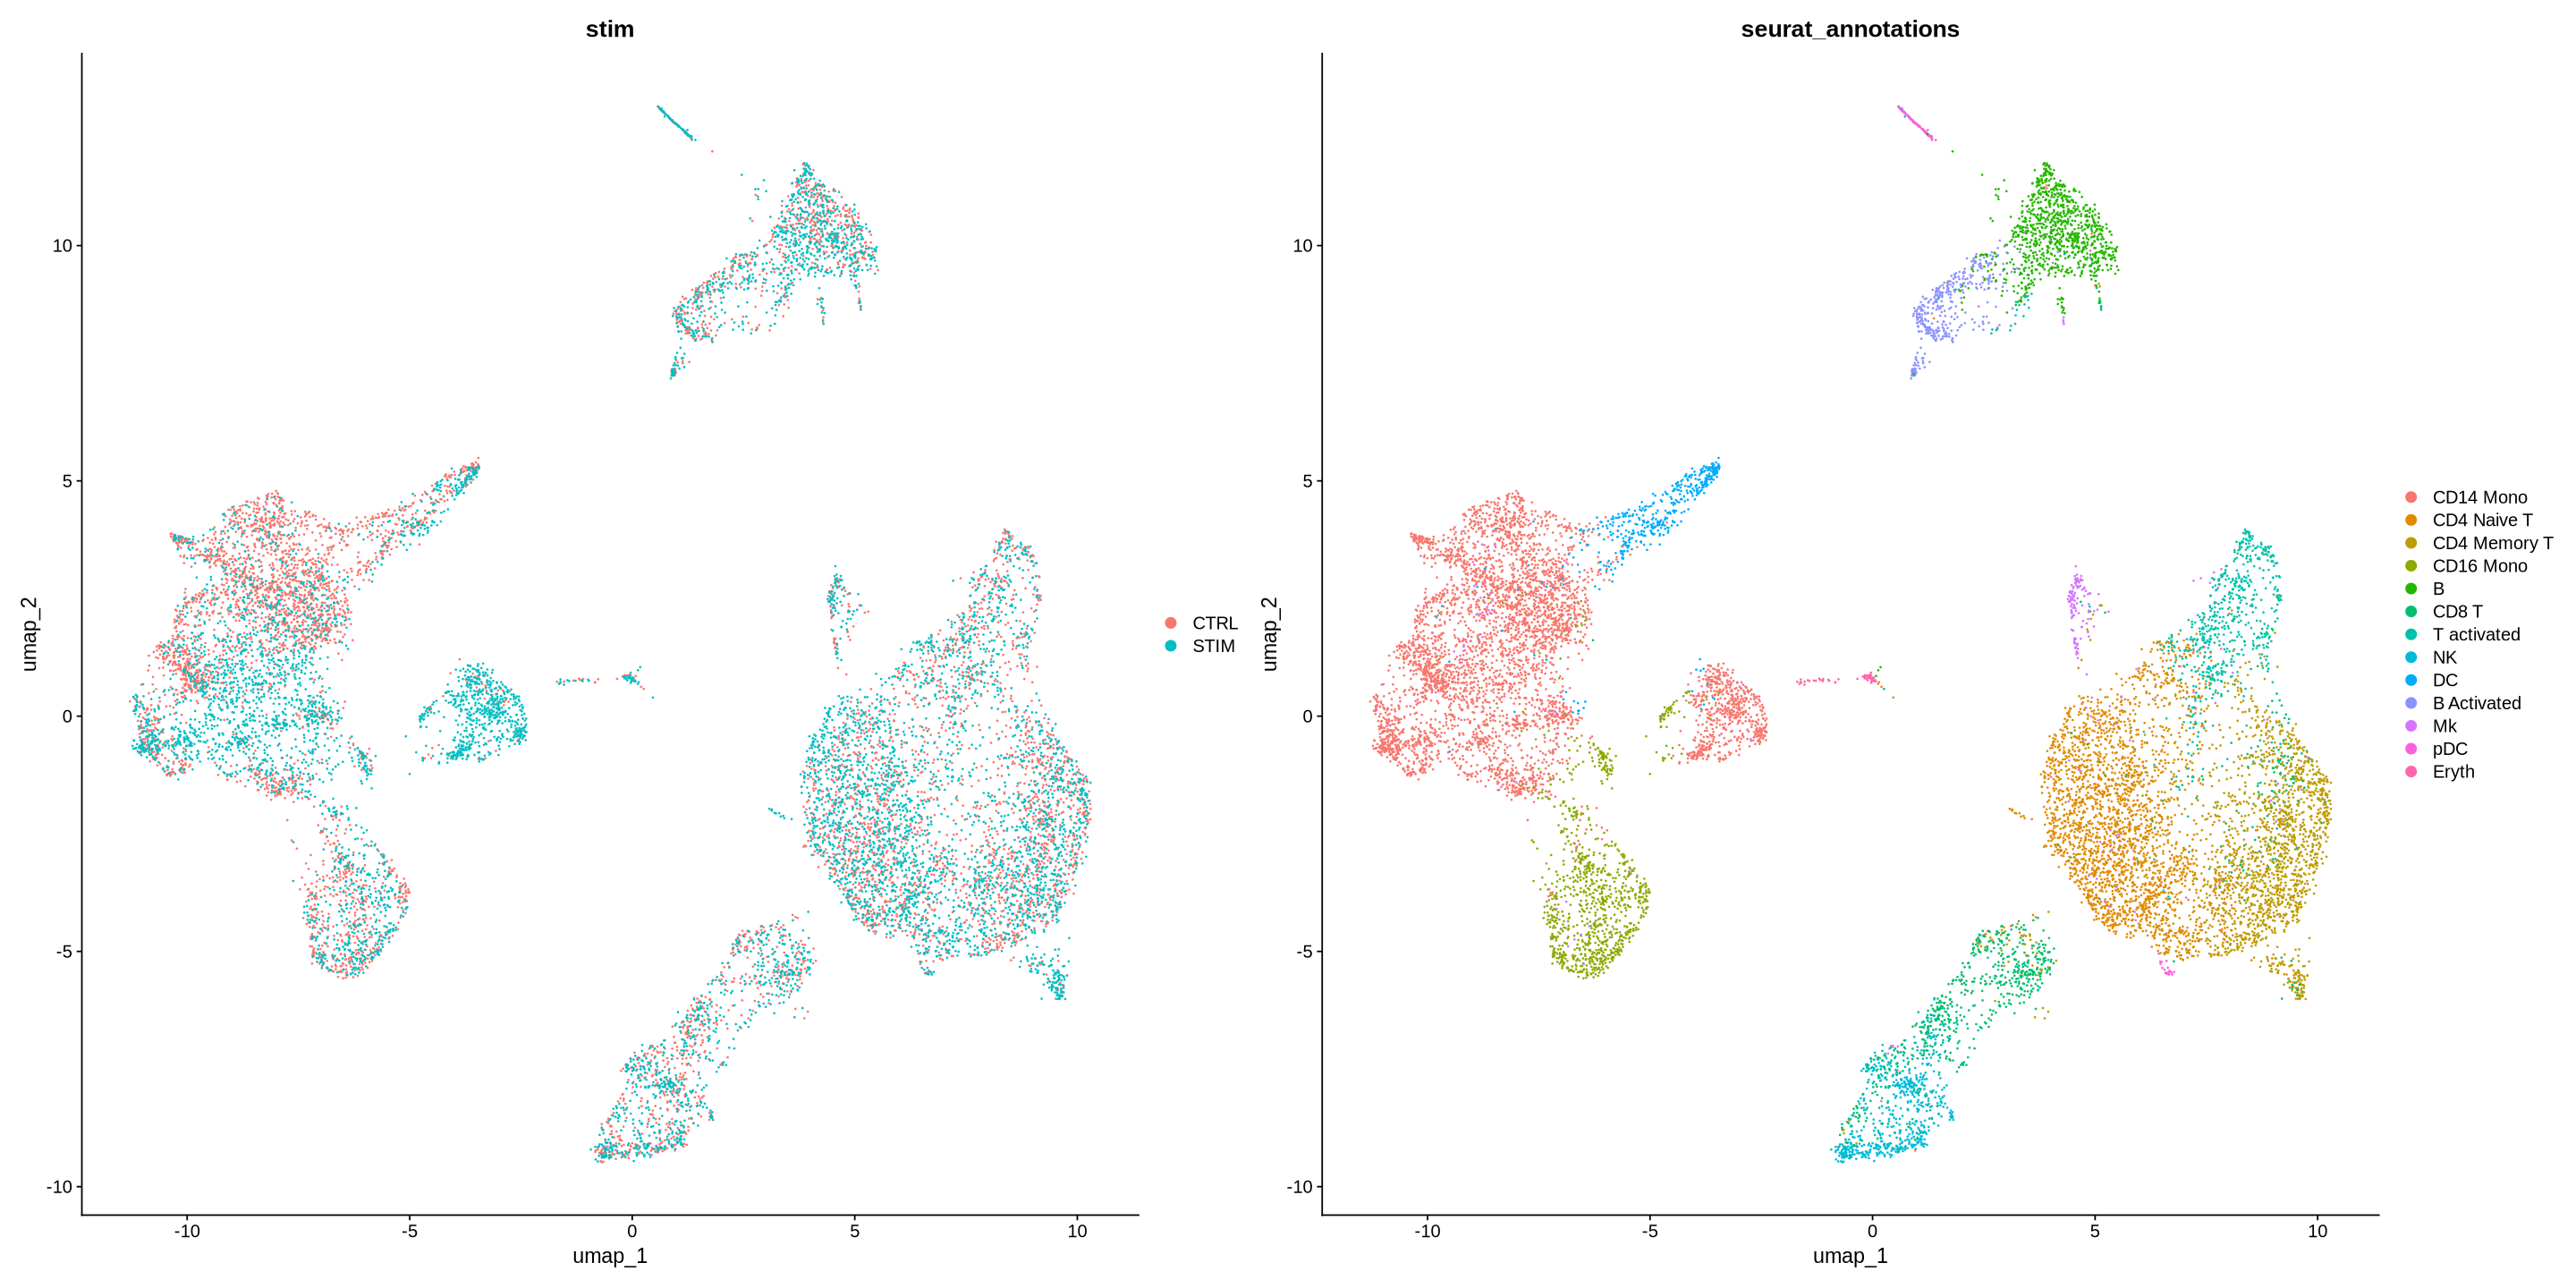

In [37]:
ifnb <- RunUMAP(ifnb, dims = 1:30, reduction = "integrated.dr")
DimPlot(ifnb, reduction = "umap", group.by = c("stim", "seurat_annotations"))

In [38]:
# perform differential expression
ifnb <- PrepSCTFindMarkers(ifnb)
ifnb$celltype.stim <- paste(ifnb$seurat_annotations, ifnb$stim, sep = "_")
Idents(ifnb) <- "celltype.stim"
b.interferon.response <- FindMarkers(ifnb, ident.1 = "B_STIM", ident.2 = "B_CTRL", verbose = FALSE)

Found 2 SCT models. Recorrecting SCT counts using minimum median counts: 1665

